In [13]:
import sys
import os
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

import src.io as sio
import src.qudi_fit_wrapper as qft
import src.helpers as shp
import src.fitting as sft

from scipy.optimize import curve_fit

plt.style.use('seaborn')

In [4]:
DATA_FOLDER = "20220405_FR0612-F2-3G6"
DATA_FOLDERPATH, FIGURE_FOLDERPATH = sio.get_data_and_figure_paths(DATA_FOLDER)

src.io :: INFO :: qudiamond folderpath is Z:/Data\20220405_FR0612-F2-3G6\


In [ ]:
os.listdir(DATA_FOLDERPATH)

In [28]:
df = pd.read_csv(os.path.join(DATA_FOLDERPATH, "LaserNormalizing.csv"))
df['Obj Power (uW)'] = df['Obj Power (mW)'] * 1e3
df = df.sort_values("")

In [34]:
df

,GUI power (mW),Obj Power (mW),Obj power (uW),Counts,Obj Power (uW)
0,100,0.36,120.000000,140,360.0
1,90,0.34,113.333333,140,340.0
2,75,0.29,96.666667,138,290.0
3,70,0.28,93.333333,134,280.0
4,60,0.24,80.000000,130,240.0
5,50,0.18,60.000000,118,180.0
6,40,0.14,46.666667,108,140.0
7,30,0.10,33.333333,97,100.0
8,20,0.05,16.666667,77,50.0
9,15,0.03,10.000000,48,30.0


In [ ]:
fig, ax = plt.subplots(figsize=(4, 3))

ax.plot(df['Obj Power (mW)'] * 1e3, df['Counts'], "o")
ax.set_ylabel("Fluorescence (kcps)")
ax.set_xlabel("Power at objective (μW)")
ax.set_title("FR0612-F2-3G6")
fig.tight_layout()

# sio.save_figures("laser_normalization", folder=FIGURE_FOLDERPATH)

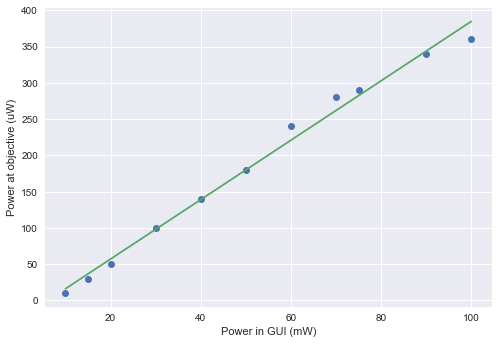

In [125]:
fig, ax = plt.subplots()

ax.plot(df['GUI power (mW)'], df['Obj Power (uW)'], "o")
popt, pcov = curve_fit(linear, df['GUI power (mW)'], df['Obj Power (uW)'])
ax.plot(df['GUI power (mW)'], linear(df['GUI power (mW)'], *popt))
ax.set_ylabel("Power at objective (uW)")
ax.set_xlabel("Power in GUI (mW)")
print()

In [18]:
def linear(x, a, b):
    return a + b * x

def logarithm(x, a, b):
    return a + b * np.log(x)

src.io :: INFO :: Saving 'saturation_point' to 'Z:/Data_Analysis\20220405_FR0612-F2-3G6'


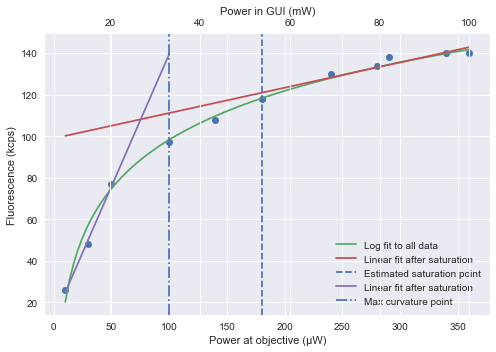

In [132]:
fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(df['Obj Power (uW)'], df['Counts'], "o")

# Log fit
popt, pcov = curve_fit(logarithm, df['Obj Power (uW)'], df['Counts'])
x = np.linspace(df['Obj Power (uW)'].min(), df['Obj Power (uW)'].max(), 100)
ax.plot(x, logarithm(x, *popt), label="Log fit to all data")

# Linear fit optimizer
# for b in range(4, 9, 1):
#     popt, pcov = curve_fit(linear, df['Obj Power (uW)'][0:b], df['Counts'][0:b])
#     ax.plot(df['Obj Power (uW)'][0:9], linear(df['Obj Power (uW)'][0:9], *popt), label=f"b={b}")

# Linear fit result
optimal_point = 6
popt, pcov = curve_fit(linear, df['Obj Power (uW)'][0:optimal_point], df['Counts'][0:optimal_point])
ax.plot(df['Obj Power (uW)'], linear(df['Obj Power (uW)'], *popt), label="Linear fit after saturation")
ax.axvline(df['Obj Power (uW)'][optimal_point - 1], linestyle="--", label="Estimated saturation point")

optimal_point = 3
popt, pcov = curve_fit(linear, df['Obj Power (uW)'][-optimal_point:], df['Counts'][-optimal_point:])
ax.plot(df['Obj Power (uW)'][-optimal_point - 1:], linear(df['Obj Power (uW)'][-optimal_point - 1:], *popt), label="Linear fit after saturation")

ax.axvline(df['Obj Power (uW)'][len(df['Obj Power (uW)']) - optimal_point - 1], linestyle="-.", label="Max curvature point")

ax.set_ylabel("Fluorescence (kcps)")
ax.set_xlabel("Power at objective (μW)")
# ax.set_title("FR0612-F2-3G6")
ax.legend()

ax2 = ax.twiny()
ax2.plot(df['GUI power (mW)'], df['Counts'], " ")
ax2.set_xlabel("Power in GUI (mW)")

fig.tight_layout()

sio.save_figures("saturation_point", folder=FIGURE_FOLDERPATH)

In [122]:
df['GUI power (mW)'].sort_values()

10     10
9      15
8      20
7      30
6      40
5      50
4      60
3      70
2      75
1      90
0     100
Name: GUI power (mW), dtype: int64